<a href="https://colab.research.google.com/github/lamld203844/kapur-and-otsu-segmentation/blob/main/main_building_blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

from scipy.ndimage import median_filter
from skimage.filters import threshold_multiotsu
from skimage.filters import threshold_otsu

%matplotlib inline

# Otsu method

<class 'numpy.ndarray'>


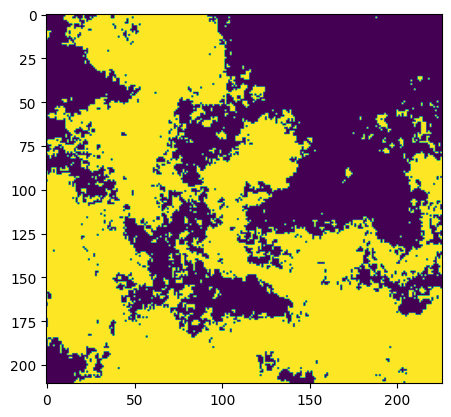

In [2]:
def otsu_segment(input_image):
    # Convert the input image to grayscale
    gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Normalize to 0 - 255
    image = cv2.normalize(gray_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    # Apply Otsu's thresholding
    thresh = threshold_otsu(image)
    binary = image > thresh

    # Convert the binary image to a 3-channel image
    # binary_3_channel = cv2.cvtColor((binary * 255).astype(np.uint8), cv2.COLOR_GRAY2BGR)

    return binary

# Test the function
# Load the image in grayscale
image_path='/content/breast_cancer.jpg'
image = cv2.imread(image_path)
print(type(image))
segmentation = otsu_segment(image)
plt.imshow(segmentation)
plt.show()

In [3]:
print(type(segmentation))
segmentation

<class 'numpy.ndarray'>


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

# Kapur method

## Using available function


<class 'numpy.ndarray'>


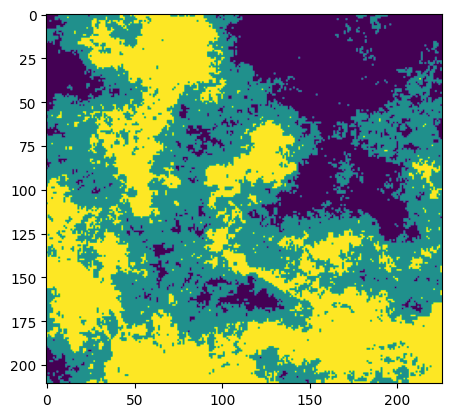

In [4]:
from skimage.filters import threshold_multiotsu

def kapur_segment(input_image):
    # Convert the input image to grayscale
    gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Normalize to 0 - 255
    image = cv2.normalize(gray_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    # Apply Kapur's method
    thresholds = threshold_multiotsu(image)

    # Apply the thresholds to get a segmented image
    segmented_image = np.digitize(image, bins=thresholds)

    # Map the segmented image from 0-255
    # segmented_image = ((segmented_image / segmented_image.max()) * 255).astype(np.uint8)

    # Convert the segmented image to a 3-channel image
    # segmented_3_channel = cv2.cvtColor(segmented_image, cv2.COLOR_GRAY2BGR)

    return segmented_image

# Test the function
image_path='/content/breast_cancer.jpg'
image = cv2.imread(image_path)
print(type(image))
segmentation = kapur_segment(image)
plt.imshow(segmentation)
plt.show()

In [5]:
print(type(segmentation))
segmentation

<class 'numpy.ndarray'>


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2]])

In [6]:
print(np.unique(segmentation.flatten()))

[0 1 2]


## Implementation from scratch

In [7]:
import numpy as np
from skimage import io, color

def kapur_threshold(image):
    # Convert image to grayscale if it is not
    if len(image.shape) > 2:
        image = color.rgb2gray(image)

    # Compute histogram
    hist = np.histogram(image.flatten(), bins=256, range=[0,256])[0]

    # Total pixels
    total_pixels = np.sum(hist)

    # Probability distribution
    prob_dist = hist/total_pixels

    max_entropy = 0
    threshold = 0

    for t in range(1, 256):
        # Calculate probabilities
        w0 = np.sum(prob_dist[:t])
        w1 = np.sum(prob_dist[t:])

        # Entropies
        entropy0 = -np.sum(prob_dist[:t]*np.log(prob_dist[:t] + np.finfo(float).eps))/w0 if w0 > 0 else 0
        entropy1 = -np.sum(prob_dist[t:]*np.log(prob_dist[t:] + np.finfo(float).eps))/w1 if w1 > 0 else 0

        # Total entropy
        entropy = w0*entropy0 + w1*entropy1

        # Update maximum entropy
        if entropy > max_entropy:
            max_entropy = entropy
            threshold = t

    return threshold

# Test the function
image = io.imread('/content/breast_cancer.jpg')
threshold = kapur_threshold(image)
print(f'The optimal threshold is: {threshold}')


The optimal threshold is: 111
